# Merging DataFrames & Series

## pd.concat( ) with Series

In [ ]:
import pandas as pd

In [ ]:
s1 = pd.Series(['a', 'b', 'c'])
s2 = pd.Series(['d', 'e', 'f', 'z'])

In [ ]:
pd.concat([s1,s2])

In [ ]:
pd.concat([s2, s1])

In [ ]:
pd.concat([s2, s1], ignore_index=True)

In [ ]:
nums = pd.Series([65,69,99,23,56,54])
nums2 = pd.Series([11,111,1111])

In [ ]:
pd.concat([s2, s1, nums], ignore_index=True)

In [ ]:
pd.concat([nums, nums2, s1], ignore_index=True)

## pd.concat( ) with Series by Index

In [ ]:
c1 = pd.Series(["red", "orange", "yellow"])
c2 = pd.Series(["green", "blue", "purple"])

In [ ]:
pd.concat([c1,c2])

In [ ]:
pd.concat([c1,c2], axis=1)

In [ ]:
fruits = pd.Series(
    data=["apple", "banana", "cherry"], 
    index=["a","b", "c"]
)

animals = pd.Series(
    data=["badger", "cougar", "anaconda"], 
    index=["b", "c", "a"]
)

In [ ]:
fruits

In [ ]:
animals

In [ ]:
pd.concat([fruits, animals], axis=1)

In [ ]:
pd.concat([fruits, animals], axis=1, keys=["fruit", "animal"])

In [ ]:
pd.concat([fruits, animals], axis=0, keys=["fruit", "animal"])

## pd.concat( ) with DataFrames

In [ ]:
fruits = pd.Series(
    data=["apple", "banana", "cherry", "durian"], 
    index=["a","b", "c", "d"]
)

animals = pd.Series(
    data=["badger", "cougar", "anaconda", "elk", "pika"], 
    index=["b", "c", "a", "e", "p"]
)

In [ ]:
pd.concat([animals, fruits], ignore_index=True)

In [ ]:
pd.concat([animals, fruits], axis=1)

In [ ]:
pd.concat([animals, fruits], axis=1, join="inner")

In [ ]:
harvest_21 = pd.DataFrame(
    [['potatoes', 900], ['garlic', 1350], ['onions', 875]], 
    columns=['crop', 'qty']
)

harvest_22 = pd.DataFrame(
    [['garlic', 1600], ['spinach', 560], ['turnips', 999], ['onions', 1000]], 
    columns=['crop', 'qty']
)

In [ ]:
harvest_21

In [ ]:
harvest_22

In [ ]:
pd.concat([harvest_21, harvest_22], ignore_index=True)

In [ ]:
pd.concat([harvest_21, harvest_22], keys=[2021, 2022])

In [ ]:
harvest_23 = pd.DataFrame(
    [['potatoes', 900, 500], ['garlic', 1350, 1200], ['onions', 875, 950]], 
    columns=['crop', 'qty', 'profit']
)

In [ ]:
pd.concat([harvest_21, harvest_22, harvest_23])

In [ ]:
pd.concat([harvest_21, harvest_22, harvest_23], join="inner")

In [ ]:
livestock = pd.DataFrame(
    [['pasture', 9], ['stable', 3], ['coop', 34]], 
    columns=['location', 'qty'],
    index=['alpaca', 'horse', 'chicken']
)
weights = pd.DataFrame(
    [[4,10], [900, 2000], [1.2, 4], [110, 150]], 
    columns=['min_weight', 'max_weight'],
    index=['chicken', 'horse', 'duck', 'alpaca']
)

In [ ]:
livestock

In [ ]:
weights

In [ ]:
pd.concat([livestock, weights])

In [ ]:
pd.concat([livestock, weights], axis=1)

In [ ]:
pd.concat([livestock, weights], axis=1, join="inner")

## Combining DataFrames With Merge

In [ ]:
teams = pd.DataFrame(
    [
        ["Suns", "Phoenix", 20, 4], 
        ["Mavericks", "Dallas", 11,12], 
        ["Rockets", "Houston", 7, 16],
        ['Nuggets', "Denver", 11, 12]
    ], 
    columns=["team", "city", "wins", "losses"]
)

In [ ]:
cities = pd.DataFrame(
    [
        ["Houston", "Texas", 2310000], 
        ["Phoenix", "Arizona", 1630000], 
        ["San Diego", "California", 1410000],
        ["Dallas", "Texas", 1310000]
    ],
    columns=["city", "state", "population"]
)

In [ ]:
teams

In [ ]:
cities

In [ ]:
teams.merge(cities)

In [ ]:
teams.merge(cities, on="city")

In [ ]:
teams.merge(cities, on="city", how="inner")

In [ ]:
teams.merge(cities, how="left")

In [ ]:
teams.merge(cities, how="right")

In [ ]:
teams.merge(cities, how="outer")

In [ ]:
cities.merge(teams, on="city", how="left")

In [ ]:
teams.merge(cities, on="city", how="right")

In [ ]:
midterms = pd.DataFrame(
    [['alex', 'padilla', 92], ['rayna', 'wilson', 83], ['juan', 'gomez', 78], ['angela', 'smith', 66],['stephen', 'yu', 98]], 
    columns=['first', 'last', 'score']
)
finals = pd.DataFrame(
    [['alex','padilla', 97, False], ['rayna', 'wilson', 88, False], ['alex', 'smith', 86, True], ['juan', 'gomez', 71, True], ['stephen', 'yu', 78, False], ['sakura', 'steel', 100, True]], 
    columns=['first', 'last','score', 'extra_credit']
)


In [ ]:
midterms

In [ ]:
finals

In [ ]:
midterms.merge(finals, on="score")

In [ ]:
midterms.merge(finals, on="first")

In [ ]:
midterms.merge(finals, on=["first", "last"], how="inner")

In [ ]:
midterms.merge(finals, on=["first", "last"], how="inner", suffixes=("_midterms", "_finals"))

In [ ]:
combo = midterms.merge(finals, on=["first", "last"], how="inner", suffixes=("_m", "_f"))

In [ ]:
combo["avg"] = (combo["score_m"] + combo["score_f"])/2

In [ ]:
combo

In [ ]:
combo.loc[combo["extra_credit"] == True, 'avg'] += 5

In [ ]:
combo

## UFOS + State Pops Example

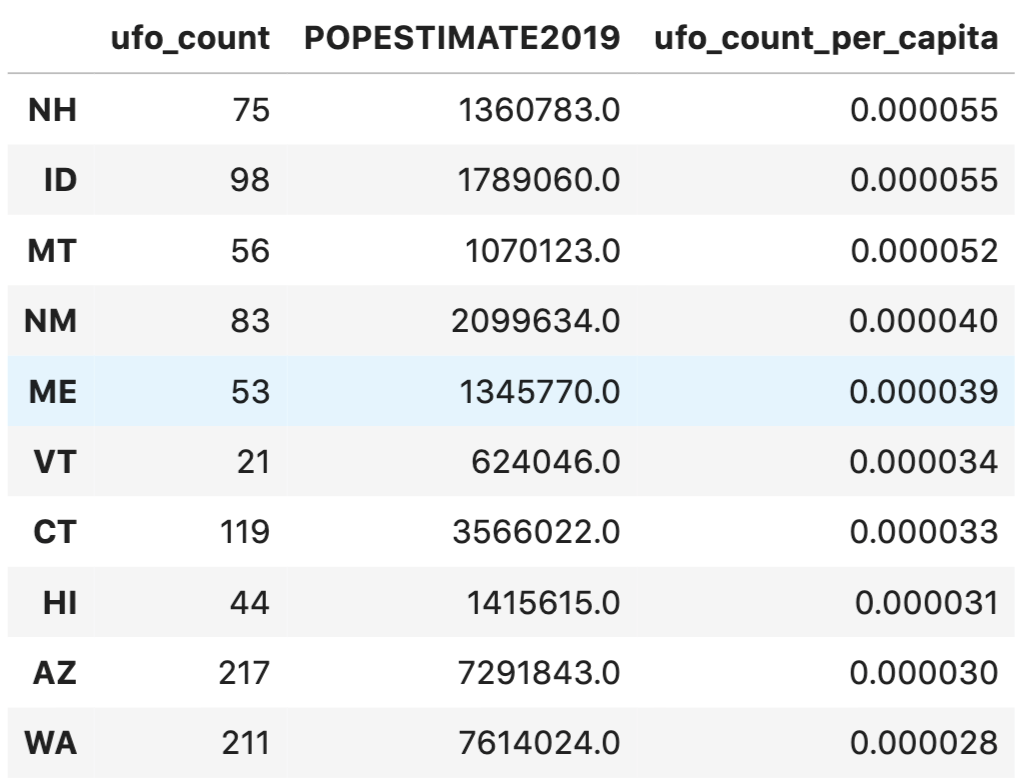

In [ ]:
ufos = pd.read_csv("data/nuforc_reports.csv", parse_dates=["date_time"])

In [ ]:
ufos

In [ ]:
ufos_19 = ufos[ufos["date_time"].dt.year == 2019]

In [ ]:
ufos_19

In [ ]:
state_pops = pd.read_csv('data/nst-est2020.csv')

In [ ]:
state_pops = state_pops[["NAME", "POPESTIMATE2019"]]
state_pops

In [ ]:
state_names = pd.read_csv("data/states.csv")
state_names

In [ ]:
state_pops_with_code = state_pops.merge(state_names, left_on="NAME", right_on="State")

In [ ]:
state_pops_2019 = state_pops_with_code.set_index("Code")["POPESTIMATE2019"]

In [ ]:
state_pops_2019

In [ ]:
ufos_19 = ufos_19.state.value_counts()

In [ ]:
df = pd.concat([ufos_19, state_pops_2019], axis=1).rename({"state": "num_sightings", "POPESTIMATE2019": "population"}, axis=1)

In [ ]:
df

In [ ]:
df["ufos_per_cap"] = df["num_sightings"] / df["population"]

In [ ]:
df.sort_values("ufos_per_cap", ascending=False).head(10)

In [ ]:
import matplotlib.pyplot as plt
df["ufos_per_cap"].sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("UFO Sightings Per Capita")

In [ ]:
d = pd.concat([ufos.state.value_counts(), state_pops_2019], axis=1)

In [ ]:
d["cap"] = d["state"] / d['POPESTIMATE2019']

In [ ]:
d.cap.sort_values(ascending=False).head(10).plot(kind="barh")

In [ ]:
ufos.state.value_counts().head(10).plot(kind="barh")